In [17]:
putinsky=randn(64,64)
map!(x->floor(x), putinsky)
putete=map(x->convert(Int16, x), putinsky)

64x64 Array{Int16,2}:
 -2   0   1  -1   0  -2   0   0  -1  …  -1  -1   0  -1   0  -2   0   0   0
 -1  -2   0   0   0  -2  -1   1   2      0  -2  -1  -2   0   0   1   0  -2
  1  -1   1  -1   2  -1   0   0  -1      1   0  -2  -1   0   0  -1  -1  -1
 -3  -1  -1  -3  -1  -1   1  -2   0     -2  -1   1  -2  -1  -1   1   0   1
 -2  -1   0   0   1   0   0   1  -1     -1   0   1   1   0  -1  -1  -1   1
 -1   0  -1  -1  -1   0  -1   0   0  …  -1   1   0  -1   1   0  -1  -1  -1
 -1  -2  -1   0   0  -2   1   0  -1     -1   0   1  -1   0  -2   0   0  -1
 -1   0   0   0   1  -1   0   0   0     -1   0   1  -2   0  -3  -1   0  -1
  1  -2   0   0   1   0   1  -1   0      1   0   0   0   1   1  -1   1  -1
 -2  -1  -2   1   0   1  -1  -1   0      1  -1   0  -1  -2  -1  -2  -1   1
  0   0   0   0   0  -1   0   0   0  …  -2  -3   1   0  -2   1   0   0  -2
 -1   0   0   0   0   1   0  -2   0      0  -1   1   0  -1  -1   1   0   0
  0  -1  -1  -1   0  -1   0  -1   1      0  -1  -1   0  -1   1  -1  -1   2
  ⋮

In [11]:
using PyPlot

INFO: Loading help data...


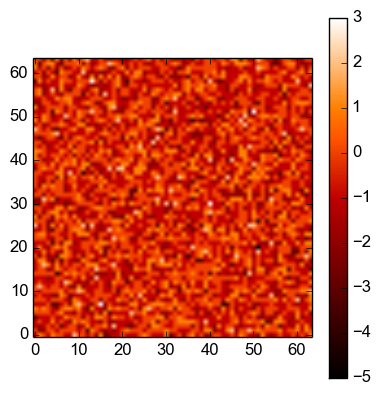

PyObject <matplotlib.colorbar.Colorbar instance at 0x7f714c914bd8>

In [13]:
figure(figsize=(4.5,4.5))
imagen=imshow(putete, cmap="gist_heat", origin="lower")
colorbar(imagen)

In [22]:
ActividadNegativa=graph(Vector[], ExEdge[],is_directed=false)
#ActividadPositiva=Graph()
#SpikeCountPositivo=zeros(64,64);
SpikeCountNegativo=zeros(64,64);
SpikeCountTotal=zeros(64,64;)
for j=1:64, k=1:64          
    if(putete[j,k]<-0.0)      
        push!(ActividadNegativa.vertices, [j, k])
        SpikeCountNegativo[j,k]+=1
    #elseif(putete[j,k]>0.0) 
    #    ActividadPositiva=vcat(ActividadPositiva, [j, k])
    #    SpikeCountPositivo[j,k]+=1
    end
end

In [23]:
ActividadNegativa

Undirected Graph (2009 vertices, 0 edges)

In [45]:
function vecindad8(punto::Array)
    j=punto[1]
    k=punto[2]
    result=Set{Array{Int64,1}}()
    push!(result, [j-1,k-1])
    push!(result, [j-1,k])
    push!(result, [j-1,k+1])
    push!(result, [j,k-1])
    push!(result, [j,k+1])
    push!(result, [j+1,k-1])
    push!(result, [j+1,k])
    push!(result, [j+1,k+1])
    return result
end
    

vecindad8 (generic function with 1 method)

In [51]:
ActividadNegativa.vertices[2]==[1, 4]

true

In [52]:
in([1, 4], ActividadNegativa.vertices)

true

In [55]:
conter=0
for a in ActividadNegativa.vertices
    for v in vecindad8(a)
        if ( in(v, ActividadNegativa.vertices)) 
            conter+=1
            lado=ExEdge(conter, a, v)
            push!(ActividadNegativa.edges, lado)
        end
    end
end
conter

7706

In [57]:
ActividadNegativa.edges

7706-element Array{ExEdge{V},1}:
 edge [1]: [1,1] -- [2,1]       
 edge [2]: [1,1] -- [2,2]       
 edge [3]: [1,6] -- [2,7]       
 edge [4]: [1,6] -- [2,6]       
 edge [5]: [1,9] -- [2,10]      
 edge [6]: [1,14] -- [2,15]     
 edge [7]: [1,14] -- [2,14]     
 edge [8]: [1,17] -- [2,16]     
 edge [9]: [1,17] -- [2,17]     
 edge [10]: [1,17] -- [1,18]    
 edge [11]: [1,18] -- [1,19]    
 edge [12]: [1,18] -- [2,17]    
 edge [13]: [1,18] -- [1,17]    
 ⋮                              
 edge [7695]: [64,48] -- [63,48]
 edge [7696]: [64,48] -- [63,47]
 edge [7697]: [64,53] -- [63,54]
 edge [7698]: [64,53] -- [64,54]
 edge [7699]: [64,54] -- [63,54]
 edge [7700]: [64,54] -- [64,53]
 edge [7701]: [64,63] -- [63,63]
 edge [7702]: [64,63] -- [63,64]
 edge [7703]: [64,63] -- [64,64]
 edge [7704]: [64,64] -- [64,63]
 edge [7705]: [64,64] -- [63,63]
 edge [7706]: [64,64] -- [63,64]

In [1]:
using Graphs

In [3]:
gr=simple_graph(5)

Directed Graph (5 vertices, 0 edges)

In [5]:
add_edge!(gr, 2,3)
add_edge!(gr, 1,3)
add_edge!(gr, 5,3)
add_edge!(gr, 4,1)


edge [4]: 4 -- 1

In [8]:
plot(gr)

Failed to open XLIB display: 
